# Importing required libraries

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import pad_sequences
from collections import Counter
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import regex as re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')

In [5]:
!pip3 install transformers

In [6]:
from transformers import pipeline

# Saving data in a dataframe

In [7]:
df = pd.read_csv('1429_1.csv')
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [8]:
#Printing caregories(names of columns) and respective details

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [10]:
#For sentiment analysis we only need reviews.text and reviews.rating. Hence, we will be saving text and ratings to a dataframe named data1

In [11]:
data1 = df[["reviews.text","reviews.rating"]]
data1.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    34659 non-null  object 
 1   reviews.rating  34627 non-null  float64
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


In [13]:
#Handling Missing data: We will be dropping missing data as there is abundant data available and filling data mean and median is going to tamper with results by misleading, as rating of consumer is independent of each other.

In [14]:
data1.dropna(inplace=True)
data1.isnull().sum()

reviews.text      0
reviews.rating    0
dtype: int64

In [15]:
import random

n_samples = 5

for _ in range(n_samples):
    i = random.choice(range(data1.shape[0]))
    print(f"REVIEW TEXT:\n{data1['reviews.text'][i]} \n\nRATE:\n{data1['reviews.rating'][i]}")
    print('\n', 90*"-", '\n')

REVIEW TEXT:
It was a perfect gift to give To my Bro-in-law techie! 

RATE:
4.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
I've been using a Kindle almost exclusively and decided to give this one as a Birthday present. Very excited recipient! 

RATE:
5.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
Love it. Makes home automation a breeze. Easy setup 

RATE:
5.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
The product is quite nifty. I personally enjoy it. I feel as though it brings everyone in the house together even if we aren't in the same room. 

RATE:
5.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
Really like this allows me to set reminders and listen to Sirius radio. Easy to set up 

RATE:
5.0

 ----------------------------------

In [16]:
data1.describe()

,reviews.rating
count,34626.000000
mean,4.584561
std,0.735660
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [17]:
data1['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    23774
4.0     8541
3.0     1499
2.0      402
1.0      410
Name: reviews.rating, dtype: int64

In [18]:
#Printing distribution of reviews wrt ratings

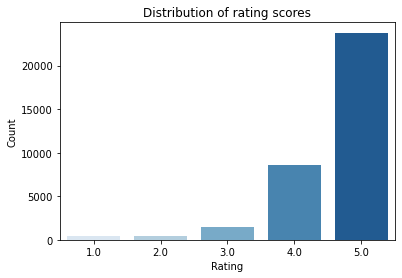

In [19]:
sns.countplot(data1['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [20]:
#Loading another dataset(we will only use negative reviews from this dataset) to balance the number of negative reviews and positive reviews.

In [21]:
data2 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
data2 = data2[['reviews.text', 'reviews.rating']]
data2 = data2[data2["reviews.rating"] <= 3].reset_index(drop=True) 

In [22]:
data3 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
data3 = data3[['reviews.text', 'reviews.rating']]
data3 = data3[data3["reviews.rating"] <= 3].reset_index(drop=True) 

In [23]:
data2['reviews.rating'].value_counts().sort_index(ascending=False)

3    1206
2     616
1     965
Name: reviews.rating, dtype: int64

In [24]:
data3['reviews.rating'].value_counts().sort_index(ascending=False)

3    197
2     54
1     63
Name: reviews.rating, dtype: int64

In [25]:
#Concatenating data1, data2, data3 and saving them in data

In [26]:
data = pd.concat([data1, data2, data3])
data.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [27]:
#Printing distribution of reviews wrt ratings

In [28]:
data['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    23774
4.0     8541
3.0     2902
2.0     1072
1.0     1438
Name: reviews.rating, dtype: int64

In [29]:
#Plotting distribution, even now the data is skewed so we will oversample the negative reviews before training.

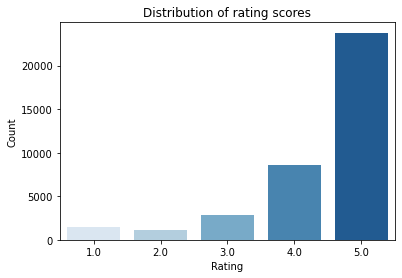

In [30]:
sns.countplot(data['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [31]:
#Classifying reviews into positive and negative by alloting them a sentiment score : 0 if rating is less than or equal to 3, 1 otherwise

In [32]:
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}
             
data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

,reviews.text,reviews.rating,sentiment_score,sentiment
0,This product so far has not disappointed. My c...,5.0,1,POSITIVE
1,great for beginner or experienced person. Boug...,5.0,1,POSITIVE
2,Inexpensive tablet for him to use and learn on...,5.0,1,POSITIVE
3,I've had my Fire HD 8 two weeks now and I love...,4.0,1,POSITIVE
4,I bought this for my grand daughter when she c...,5.0,1,POSITIVE


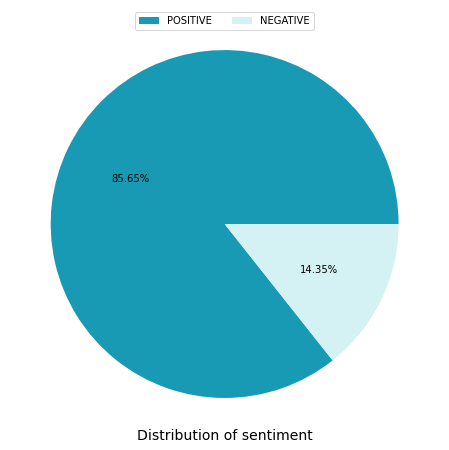

In [33]:
plt.figure(figsize = (8, 8))
labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)
plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [34]:
all_words = pd.Series(' '.join(data['reviews.text']).split())

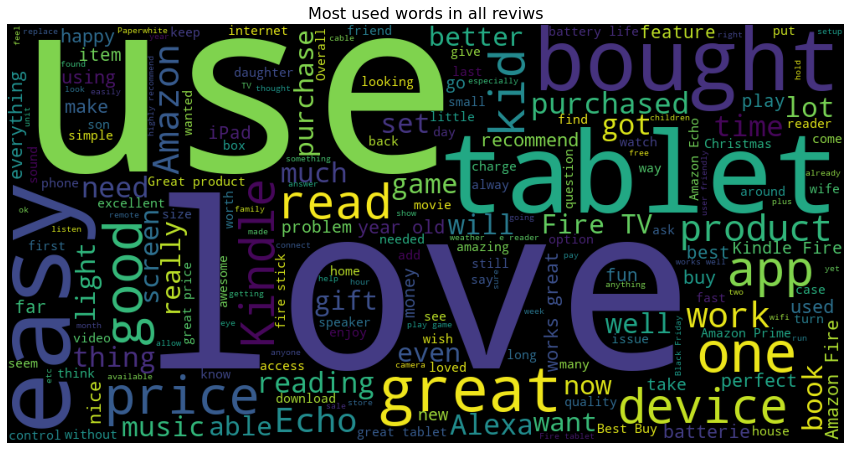

In [35]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviws", size=16)

plt.axis("off")
plt.show()

In [36]:
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['reviews.text']).split())

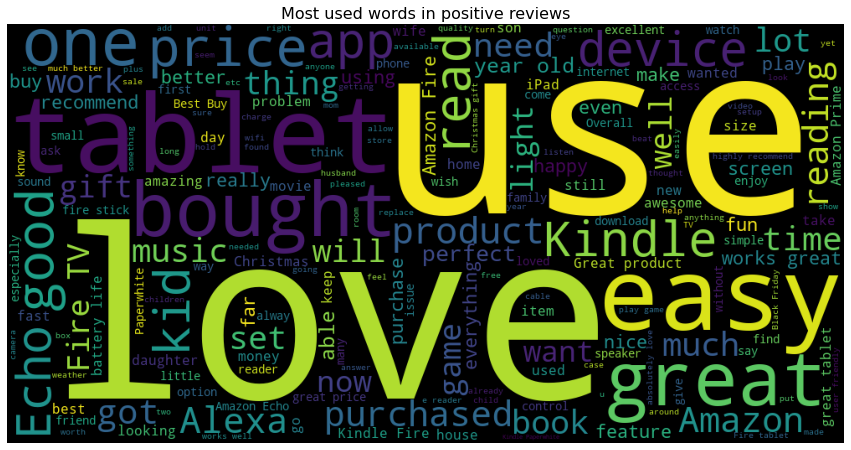

In [37]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in positive reviews", size=16)

plt.axis("off")
plt.show()

In [38]:
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['reviews.text']).split())

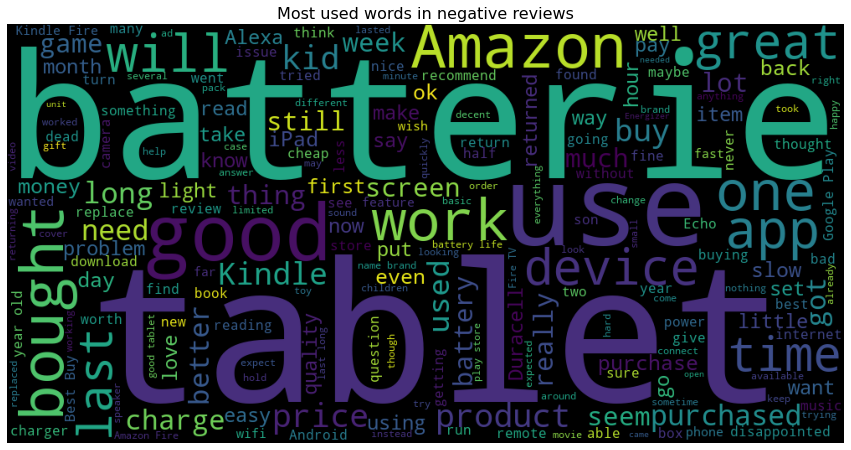

In [39]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=16)

plt.axis("off")
plt.show()

In [40]:
#Defining a function to clean text, this function converts all letters to lower case, removes punctuations, digits, whitespaces, and HTML tags.

In [41]:
def clean_text(text:str):
    text = str(text)
    text = text.lower()
    text = text.strip()
    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip()
    
    return text

In [42]:
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
clean_text(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'this is a message to be cleaned it may involve some things like adjacent spaces and tabs'

In [43]:
#Defining a function to remove words that do contribute towards the sentiment of comment that is generic and connecting words.

In [44]:
def remove_stopwords(text:str):
    
    text = str(text)
    filtered_sentence = []

    stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    
    return text

In [45]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Swetha
[nltk_data]     Verma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [46]:
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
remove_stopwords(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'message be cleaned may involve some things like adjacent spaces tabs'

In [47]:
#Stemming: Considering similar words the same

In [48]:
def stemm_text(text:str):

    text = str(text)
  
    snow = SnowballStemmer('english')

    stemmed_sentence = []
   
    words = word_tokenize(text)
    for w in words:
        
        stemmed_sentence.append(snow.stem(w))
    text = " ".join(stemmed_sentence)
    
    return text

In [49]:
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
text = remove_stopwords(text)
stemm_text(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'messag be clean may involv some thing like adjac space tab'

In [50]:
#We can see that stemming isn't performing well(messag, involv), so we will be using lemmatization

In [51]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [52]:
def lemmatize(text:str):
    text = str(text)
    
    wl = WordNetLemmatizer()

    lemmatized_sentence = []

    words = word_tokenize(text)
    
    word_pos_tags = nltk.pos_tag(words)
    
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatized_text = " ".join(lemmatized_sentence)
    
    return lemmatized_text

In [53]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Swetha Verma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [54]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Swetha
[nltk_data]     Verma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [55]:
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
text = remove_stopwords(text)
lemmatize(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'message be clean may involve some thing like adjacent space tabs'

In [56]:
data['text'] = data['reviews.text'].apply(clean_text)
data['text'] = data['text'].apply(remove_stopwords)
data['text'] = data['text'].apply(lemmatize)

In [57]:
import random

i = random.choice(range(len(data)))

print(f"Original review: \n{data['reviews.text'].iloc[i]}\n")
print(f"Processed review: \n{data['text'].iloc[i]}")     

Original review: 
They were using them on Christmas morning!! It didn't take them long too be getting the best from those tablets

Processed review: 
they be use them on christmas morning didn t take them long too be get best from those tablet


In [58]:
data.to_csv('cleaned_data.csv', index=False)

In [59]:
data = pd.read_csv('cleaned_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37727 entries, 0 to 37726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviews.text     37727 non-null  object 
 1   reviews.rating   37727 non-null  float64
 2   sentiment_score  37727 non-null  int64  
 3   sentiment        37727 non-null  object 
 4   text             37726 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ MB


In [60]:
data[data['text'].isnull()]

,reviews.text,reviews.rating,sentiment_score,sentiment,text
9681,.................................................,5.0,1,POSITIVE,NaN


In [61]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37726 entries, 0 to 37726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviews.text     37726 non-null  object 
 1   reviews.rating   37726 non-null  float64
 2   sentiment_score  37726 non-null  int64  
 3   sentiment        37726 non-null  object 
 4   text             37726 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.7+ MB


In [62]:
vectorizer = TfidfVectorizer(max_features=700)
vectorizer.fit(data['text'])
features = vectorizer.transform(data['text'])

features.toarray()

array([[0.        , 0.31997416, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [63]:
tf_idf = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
# tf_idf.drop('50', axis=1, inplace=True)
tf_idf.head()

,50,ability,able,about,absolutely,access,account,actually,ad,add,...,would,wouldn,wrong,year,yet,you,young,your,youtube,yr
0,0.0,0.319974,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.114228,0.0,0.0,0.129196,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.075228,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.117444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.068385,0.0,0.0,0.0,0.0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf, data['sentiment_score'], test_size=0.2, random_state=42)

print (f'Train set shape\t:{X_train.shape}\nTest set shape\t:{X_test.shape}')

Train set shape	:(30180, 700)
Test set shape	:(7546, 700)


In [65]:
yy = pd.DataFrame(y_train)
train_data = pd.concat([X_train, yy],axis=1)
train_data.head()

,50,ability,able,about,absolutely,access,account,actually,ad,add,...,wouldn,wrong,year,yet,you,young,your,youtube,yr,sentiment_score
0,0.0,0.319974,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.0,0.000000,0.114228,0.0,0.0,0.129196,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.075228,0.0,0.0,0.0,0.0,1.0
5,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.16796,0.0,0.000000,0.0,0.0,0.0,0.0,1.0


In [66]:
train_data['sentiment_score'].value_counts()

1.0    25902
0.0     4278
Name: sentiment_score, dtype: int64

In [67]:
target_count = train_data['sentiment_score'].value_counts()
negative_class = train_data[train_data['sentiment_score'] == 0]
positive_class = train_data[train_data['sentiment_score'] == 1]

negative_over = negative_class.sample(target_count[1], replace=True)

df_train_over = pd.concat([positive_class, negative_over], axis=0)
df_train_over = shuffle(df_train_over)
df_train_over.head()

,50,ability,able,about,absolutely,access,account,actually,ad,add,...,wouldn,wrong,year,yet,you,young,your,youtube,yr,sentiment_score
30933,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
37284,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36221,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34781,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22397,0.0,0.390221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
df_train_over.dropna(inplace=True)

In [69]:
df_train_over['sentiment_score'].value_counts()

1.0    22189
0.0    21439
Name: sentiment_score, dtype: int64

In [70]:
X_train = df_train_over.iloc[:,:-1]
y_train = df_train_over['sentiment_score']

# Models

Multinomial Naivebayes

In [71]:
def modeling(Model, Xtrain = X_train, Xtest = X_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """ 
    # Instantiate the classifier: model
    model = Model
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    # Assign f1 score to a variable
    print(classification_report(y_test, y_pred))
    print ('AUC ',roc_auc_score(y_test, y_pred))
    #cm = confusion_matrix(y_test, y_pred)
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['Actual'], colnames=['Predictions']).astype(int)
    plt.figure(figsize = (8,8))
    '''
    cmapGR = LinearSegmentedColormap.from_list(
        name='test', 
        colors=['red','green']
    )
    '''
    sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='Blues').set_title('Confusion Matrix') 

              precision    recall  f1-score   support

           0       0.45      0.76      0.57      1134
           1       0.95      0.83      0.89      6412

    accuracy                           0.82      7546
   macro avg       0.70      0.80      0.73      7546
weighted avg       0.88      0.82      0.84      7546

AUC  0.7996176151197985


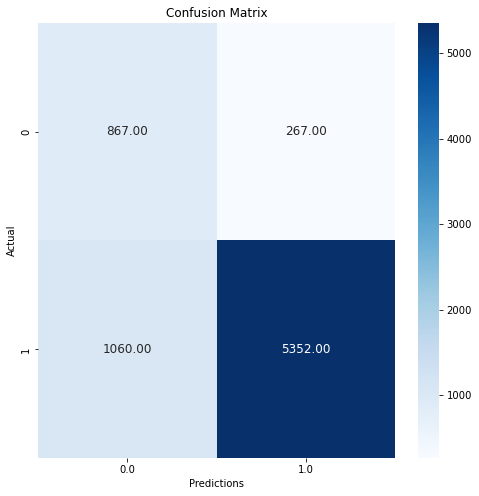

In [72]:
modeling(MultinomialNB())

KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [75]:
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))

0.8897429101510734


In [76]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.68      0.50      0.58      1134\n           1       0.92      0.96      0.94      6412\n\n    accuracy                           0.89      7546\n   macro avg       0.80      0.73      0.76      7546\nweighted avg       0.88      0.89      0.88      7546\n'

support vector machine

In [77]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) 
predsvm=clf.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predsvm))
print('\n')
print(classification_report(y_test, predsvm))
predsvm=clf.predict(X_test)
clf.score(X_train,y_train)

[[ 716  418]
 [  86 6326]]


              precision    recall  f1-score   support

           0       0.89      0.63      0.74      1134
           1       0.94      0.99      0.96      6412

    accuracy                           0.93      7546
   macro avg       0.92      0.81      0.85      7546
weighted avg       0.93      0.93      0.93      7546



0.9925277344824425

GradientBoostingClassifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(X_train, y_train)
predicted= model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predicted))
print('\n')
print(classification_report(y_test, predicted))
model.score(X_train,y_train)

[[ 921  213]
 [1264 5148]]


              precision    recall  f1-score   support

           0       0.42      0.81      0.55      1134
           1       0.96      0.80      0.87      6412

    accuracy                           0.80      7546
   macro avg       0.69      0.81      0.71      7546
weighted avg       0.88      0.80      0.83      7546



0.7646236361969377

RNN

In [80]:
data["sentiment_score"] = data["sentiment_score"].astype("str")

In [81]:
reviews = data['reviews.text']
labels = data['sentiment_score']

In [82]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Swetha
[nltk_data]     Verma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [83]:
stop = set(stopwords.words('english'))

In [84]:
def clean_document(doco):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop])
#     doco_clean = [spell(word) for word in doco_clean]
#     p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
#     doco_clean = ([spell(k) for k in doco_clean])
    return doco_clean

In [85]:
# Generate a cleaned reviews array from original review texts
review_cleans = [clean_document(doc) for doc in reviews];
sentences = [' '.join(r) for r in review_cleans ]

In [86]:
print(sentences[7])

gave christmas gift inlaws husband uncle loved easy use fantastic features


In [87]:
print(reviews[7])

I gave this as a Christmas gift to my inlaws, husband and uncle. They loved it and how easy they are to use with fantastic features!


In [88]:
reviews.shape

(37726,)

In [89]:
from keras.preprocessing.text import Tokenizer

In [90]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [91]:
text_sequences = np.array(tokenizer.texts_to_sequences(sentences))
sequence_dict = tokenizer.word_index
word_dict = dict((num, val) for (val, num) in sequence_dict.items())

In [92]:
print(text_sequences)

[list([14, 85, 305, 211, 4, 3, 13, 325, 1382, 135, 229, 171, 347])
 list([1, 679, 1628, 495, 9, 42, 27])
 list([389, 2, 3, 360, 854, 1915, 1050, 360, 1709, 195]) ...
 list([210, 503, 174]) list([238, 3, 212, 323, 1938, 2756, 21])
 list([158, 21, 39, 90])]


In [93]:
print(sequence_dict)

{'great': 1, 'tablet': 2, 'use': 3, 'love': 4, 'amazon': 5, 'easy': 6, 'good': 7, 'kindle': 8, 'bought': 9, 'one': 10, 'fire': 11, 'price': 12, 'like': 13, 'product': 14, 'would': 15, 'get': 16, 'works': 17, 'echo': 18, 'much': 19, 'kids': 20, 'apps': 21, 'read': 22, 'music': 23, 'alexa': 24, 'well': 25, 'buy': 26, 'loves': 27, 'device': 28, 'books': 29, 'time': 30, 'reading': 31, 'really': 32, 'best': 33, 'old': 34, 'purchased': 35, 'games': 36, 'screen': 37, 'also': 38, 'play': 39, 'got': 40, 'better': 41, 'gift': 42, 'recommend': 43, 'set': 44, 'year': 45, 'new': 46, 'battery': 47, 'batteries': 48, 'little': 49, 'nice': 50, 'perfect': 51, 'quality': 52, 'home': 53, 'even': 54, 'light': 55, 'purchase': 56, 'work': 57, 'using': 58, 'need': 59, 'lot': 60, 'prime': 61, 'christmas': 62, 'used': 63, 'first': 64, 'able': 65, 'want': 66, 'movies': 67, 'size': 68, 'still': 69, 'many': 70, 'son': 71, 'could': 72, 'long': 73, 'everything': 74, 'happy': 75, 'sound': 76, 'app': 77, 'things': 78,

In [94]:
reviews_encoded = [];
for i,review in enumerate(review_cleans):
    reviews_encoded.append([sequence_dict[x] for x in review]);

(array([  17.,  130.,  234.,  349., 1041., 2427., 3689., 3701., 3198.,
        2533., 2187., 1848., 1543., 1453., 1237., 1000.,  971.,  851.,
         805.,  691.,  637.,  587.,  515.,  870.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <BarContainer object of 24 artists>)

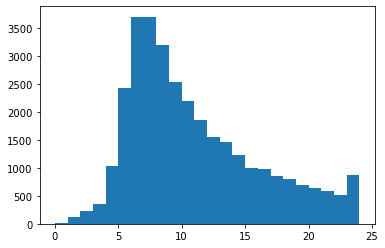

In [95]:
lengths = [len(x) for x in reviews_encoded]
plt.hist(lengths, bins=range(25))

In [96]:
print(reviews_encoded[135])

[846, 5, 2, 7, 2, 12, 951, 547, 283, 168, 1811, 730, 659, 7, 355, 3, 2, 145, 571, 450, 116, 2096, 57, 1354, 15, 43, 201, 119, 250, 1591, 2]


In [97]:
max_cap =8;
X = pad_sequences(reviews_encoded, maxlen=max_cap, truncating='post')

In [98]:
Y = np.array([[0,1] if '0' in sentiment_score else [1,0] for sentiment_score in labels])

In [99]:
np.random.seed(1024);
random_posits = np.arange(len(X))
np.random.shuffle(random_posits);

In [100]:
X = X[random_posits];
Y = Y[random_posits];

In [101]:
train_cap = int(0.85 * len(X));
dev_cap = int(0.93 * len(X));

In [102]:
X_train, Y_train = X[:train_cap], Y[:train_cap]
X_dev, Y_dev = X[train_cap:dev_cap], Y[train_cap:dev_cap]
X_test1, Y_test1 = X[dev_cap:], Y[dev_cap:]

In [103]:
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.embeddings import Embedding


model1 = Sequential();
model1.add(Embedding(len(word_dict)+1, max_cap, input_length=max_cap));
#adding a LSTM layer of dim 1--
model1.add(LSTM(150, return_sequences=True));
model1.add(LSTM(150, return_sequences=False));
#adding a dense layer with activation function of relu
model1.add(Dense(100, activation='relu'));#best 50,relu
#adding the final output activation with activation function of softmax
model1.add(Dense(2, activation='sigmoid'));
print(model1.summary());
optimizer = Adam(lr=0.0001, decay=0.0001);

model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# fit model and run it for 5 epochs
model1.fit(X_train, Y_train, batch_size=16, epochs=5, validation_data=(X_dev, Y_dev))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 8)              112392    
                                                                 
 lstm (LSTM)                 (None, 8, 150)            95400     
                                                                 
 lstm_1 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 100)               15100     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 403,694
Trainable params: 403,694
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
2005/2005 [========================

In [104]:
score = model1.evaluate(X_test1, Y_test1)
print("Test accuracy: %0.4f%%" % (score[1]*100))

83/83 [==============================] - 0s 5ms/step - loss: 0.2514 - accuracy: 0.9103
Test accuracy: 91.0261%
